In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations
import numpy as np
import plotly.express as px

import warnings
# Suppresses FutureWarning 
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv('train.csv')

Filtering numeric and categorical features

In [2]:
df.columns

target_col = "SalePrice"

In [3]:
df["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [4]:
num_cols = df.drop(["Id"], axis=1).select_dtypes(exclude="object").columns.tolist()
cat_cols = df.drop(["Id", "SalePrice"], axis=1).select_dtypes(include="object").columns.tolist()

Get correlation of entire dataframe (this was a nice idea but is replaced by code below since making a correlation matrix with categorical values produce BIAS when trying to remove highly correlated columns, so only use numerical cols when making a correlation matrix)

In [5]:

ass = associations(df, plot=False)
correlations = ass['corr']

# Replace diagonal and upper triangular elements with Nan to exlude self correlation
df_corr = correlations.where(~np.triu(np.ones(correlations.shape), k=1).astype(bool))

View highest correlations

In [6]:
# Stack the correlation matrix to convert it into a Series
stacked_corr = df_corr.stack()

# Sort the correlation values in descending order and drop NaN values
highest_corr = stacked_corr.sort_values(ascending=False).dropna()

# Drop out all values equal to 1 so that not same item correlation happens
highest_corr_filtered = highest_corr[(highest_corr != 1)]

highest_corr_filtered.head(20)



GarageFinish  GarageYrBlt     0.999025
GarageYrBlt   GarageType      0.998872
GarageQual    GarageYrBlt     0.998786
GarageCond    GarageYrBlt     0.998732
PoolQC        PoolArea        0.990775
MiscVal       MiscFeature     0.935741
2ndFlrSF      HouseStyle      0.916506
FireplaceQu   Fireplaces      0.901204
YearBuilt     Neighborhood    0.883812
GarageArea    GarageCars      0.882475
BldgType      MSSubClass      0.863889
BsmtFinSF2    BsmtFinType2    0.838641
TotRmsAbvGrd  GrLivArea       0.825489
1stFlrSF      TotalBsmtSF     0.819530
SalePrice     OverallQual     0.790982
KitchenAbvGr  BldgType        0.778076
Foundation    YearBuilt       0.761337
Exterior2nd   Exterior1st     0.758884
BsmtQual      YearBuilt       0.750716
SalePrice     Neighborhood    0.738630
dtype: float64

In [7]:
correlations

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,0.053673,-0.019761,-0.033226,0.008916,0.002885,0.062937,0.024296,0.013324,...,0.057044,0.069280,0.024927,0.063398,-0.006242,0.021172,0.000712,0.081004,0.042422,-0.021917
MSSubClass,0.011156,1.000000,0.349270,-0.215023,-0.139781,0.024969,0.188233,0.123571,0.037980,0.022844,...,0.008283,0.024812,0.119103,0.074159,-0.007683,-0.013585,-0.021407,0.111426,0.060590,-0.084284
MSZoning,0.053673,0.349270,1.000000,0.134045,0.205819,0.249384,0.388841,0.152191,0.102102,0.000000,...,0.035591,0.000000,0.025450,0.000000,0.022909,0.064259,0.042875,0.150903,0.136065,0.327963
LotFrontage,-0.019761,-0.215023,0.134045,1.000000,0.100739,0.025107,0.064913,0.190091,0.124251,0.043535,...,0.114106,0.152119,0.019669,0.070336,-0.059606,0.018942,-0.012094,0.190363,0.187632,0.209624
LotArea,-0.033226,-0.139781,0.205819,0.100739,1.000000,0.197131,0.084230,0.371568,0.375869,0.010123,...,0.077672,0.101577,0.051850,0.112026,0.038068,0.001205,-0.014261,0.031340,0.040402,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.064259,0.018942,0.001205,0.003690,0.022350,0.033669,0.084457,0.051552,...,-0.033737,0.040255,0.050725,0.026421,-0.006495,1.000000,-0.145721,0.123407,0.096080,0.046432
YrSold,0.000712,-0.021407,0.042875,-0.012094,-0.014261,0.025043,0.022192,0.045683,0.026413,0.023353,...,-0.059689,0.064768,0.069390,0.087355,0.004906,-0.145721,1.000000,0.156007,0.156572,-0.028923
SaleType,0.081004,0.111426,0.150903,0.190363,0.031340,0.110886,0.035549,0.000000,0.030262,0.130824,...,0.017377,0.000000,0.056467,0.000000,0.032522,0.123407,0.156007,1.000000,0.470819,0.370523
SaleCondition,0.042422,0.060590,0.136065,0.187632,0.040402,0.099458,0.064614,0.001923,0.107176,0.076153,...,0.145597,0.111456,0.071734,0.000000,0.037372,0.096080,0.156572,0.470819,1.000000,0.368100


Correlation in relation to saleprice

In [8]:
saleprice_corr = correlations["SalePrice"]

Here the correct correlations with only the relation with numerical values

In [9]:
corr_matrix = df[num_cols].corr()

# Replace diagonal and upper triangular elements with Nan to exlude self correlation
df_corr = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

Get highly correlated feature pairs

In [10]:
# Stack the correlation matrix to convert it into a Series
stacked_corr = df_corr.stack()

# Sort the correlation values in descending order and drop NaN values
highest_corr = stacked_corr.sort_values(ascending=False).dropna()

# Drop out all values equal to 1 so that not same item correlation happens
highest_corr_filtered = highest_corr[(highest_corr != 1)]

highest_corr_filtered.head(5)


GarageArea    GarageCars     0.882475
GarageYrBlt   YearBuilt      0.825667
TotRmsAbvGrd  GrLivArea      0.825489
1stFlrSF      TotalBsmtSF    0.819530
SalePrice     OverallQual    0.790982
dtype: float64

In [11]:
# Plotting a one-sided correlation matrix:
fig = px.imshow(df_corr)
fig.show()

In [12]:
def lowestTargetCorr(val: tuple, corr_matrix: pd.DataFrame, target_column_name: str) -> str:
    """Finds which value in tuple has highest correlation with target"""
    corr_column1 = abs(corr_matrix.loc[val[0], target_column_name])
    corr_column2 = abs(corr_matrix.loc[val[1], target_column_name])

    if corr_column1 >= corr_column2:
        return val[1]
    return val[0]

Here we check which col have a high correlation with each other and drops 1 of the columns which has the least correlation with the target of the 2

In [13]:

high_corr_names = highest_corr_filtered[highest_corr_filtered > 0.8].index.tolist()

print(high_corr_names)

# Here we check which value of the 2 most correlated has the lowest correlation with the target
removeable_cols = [lowestTargetCorr(pair, df_corr, target_col) for pair in high_corr_names]

removeable_cols.append(target_col)

print(removeable_cols)

[('GarageArea', 'GarageCars'), ('GarageYrBlt', 'YearBuilt'), ('TotRmsAbvGrd', 'GrLivArea'), ('1stFlrSF', 'TotalBsmtSF')]
['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'SalePrice']


In [14]:
# remove the columns with high correlation
num_cols = [col for col in num_cols if col not in removeable_cols]

all_features = num_cols + cat_cols

# EDA for categorical variables

Basics statics for categorical values

In [15]:
cat_stats = []

for c in cat_cols:
    stats = {
        'column': c,
        'values': df[c].unique(),
        'values_count_incna': len(df[c].unique()),
        'values_count_nona': df[c].nunique(),
        'num_miss': df[c].isnull().sum(),
        'pct_miss': (df[c].isnull().sum() / len(df)).round(3) * 100
    }
    cat_stats.append(stats)

# convert the list of dicts to df
df_cat_stats = pd.DataFrame(cat_stats)

# make it ascending based on values_count_incna
df_cat_stats.sort_values(by = 'values_count_incna', inplace=True, ascending=True)

# Set the index to column names
df_cat_stats.set_index('column', inplace=True)

df_cat_stats


,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
Street,"[Pave, Grvl]",2,2,0,0.0
CentralAir,"[Y, N]",2,2,0,0.0
Utilities,"[AllPub, NoSeWa]",2,2,0,0.0
Alley,"[nan, Grvl, Pave]",3,2,1369,93.8
LandSlope,"[Gtl, Mod, Sev]",3,3,0,0.0
PavedDrive,"[Y, N, P]",3,3,0,0.0
PoolQC,"[nan, Ex, Fa, Gd]",4,3,1453,99.5
KitchenQual,"[Gd, TA, Ex, Fa]",4,4,0,0.0
GarageFinish,"[RFn, Unf, Fin, nan]",4,3,81,5.5


Frequency distribution on categorical data visualized

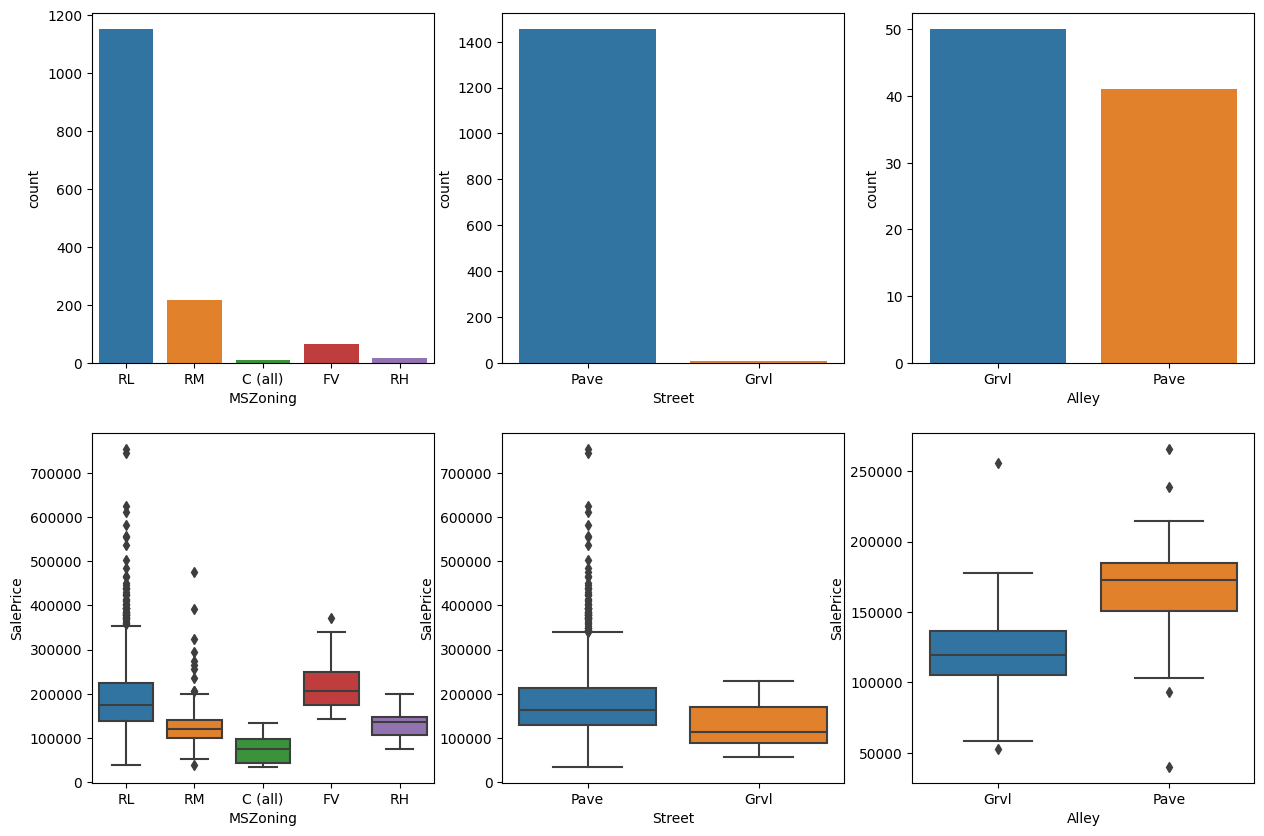

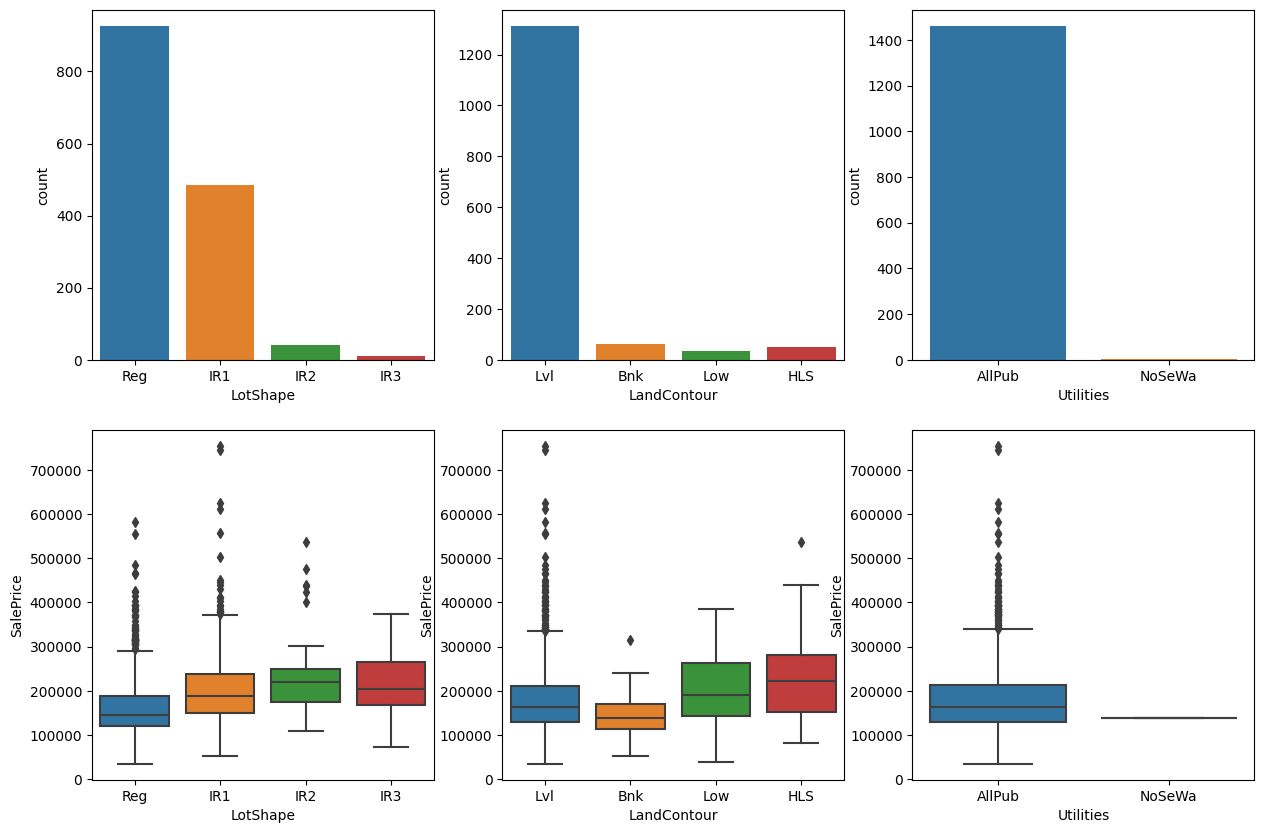

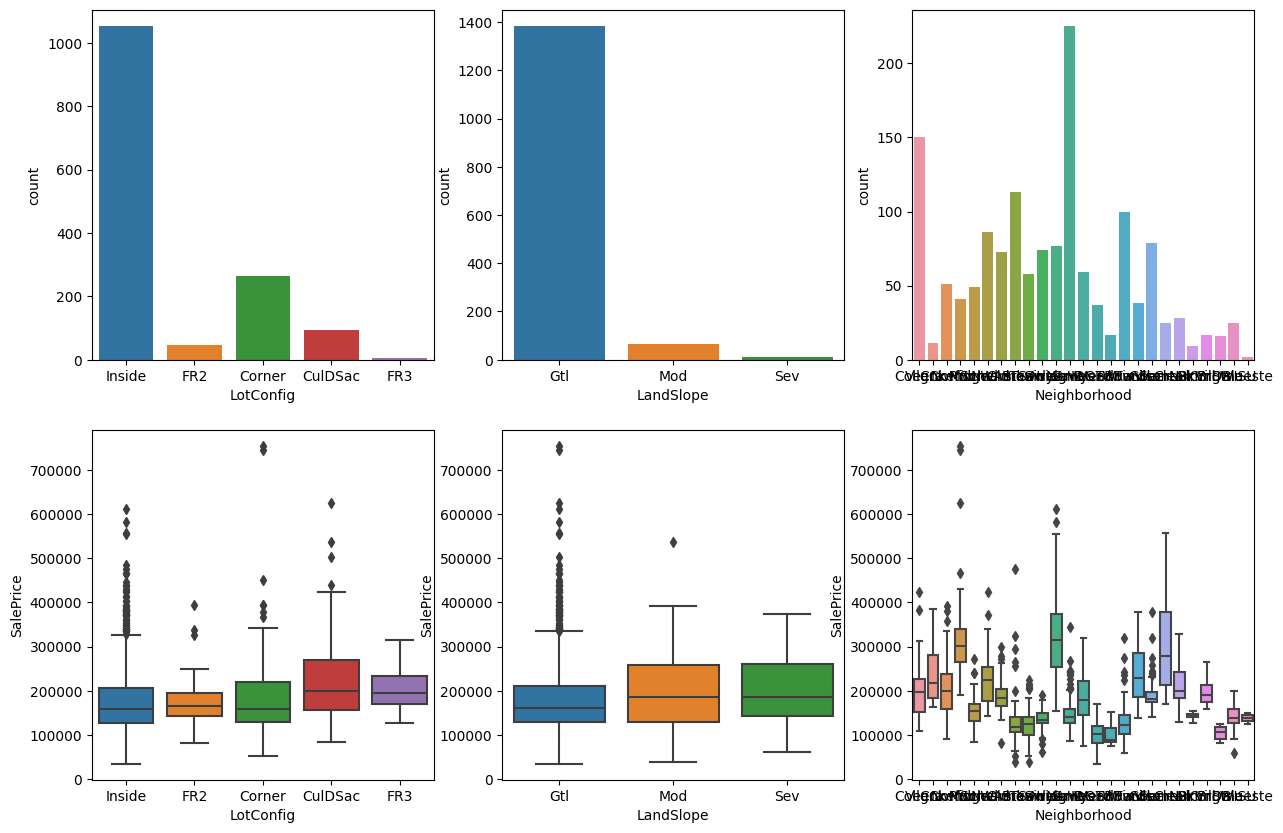

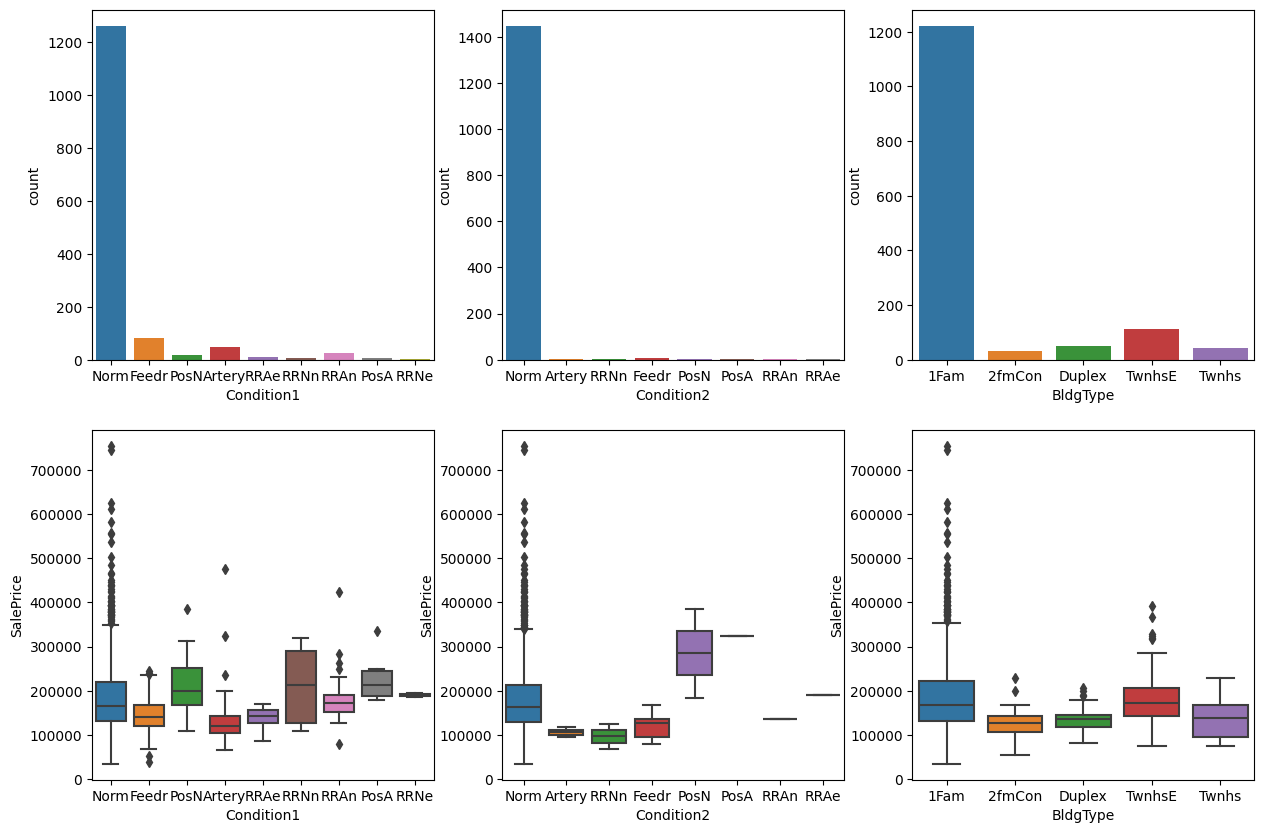

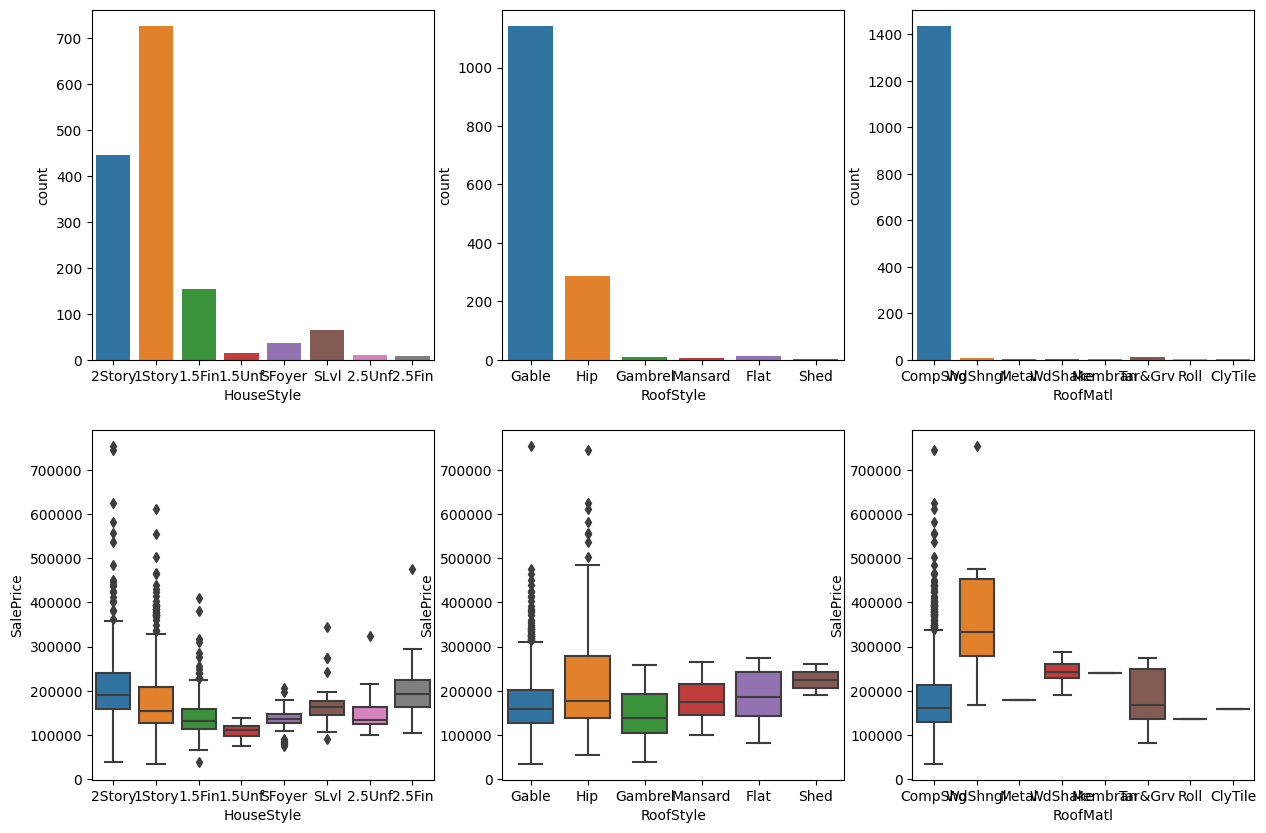

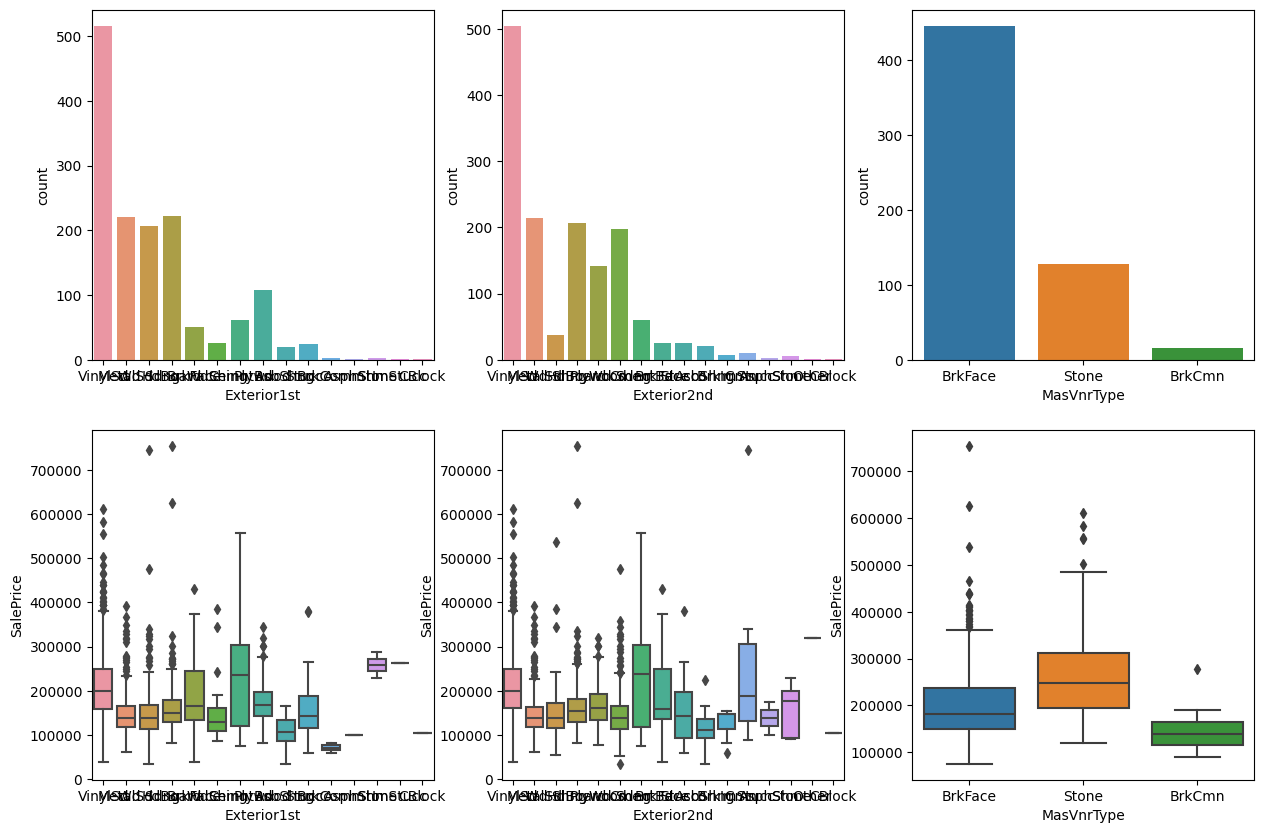

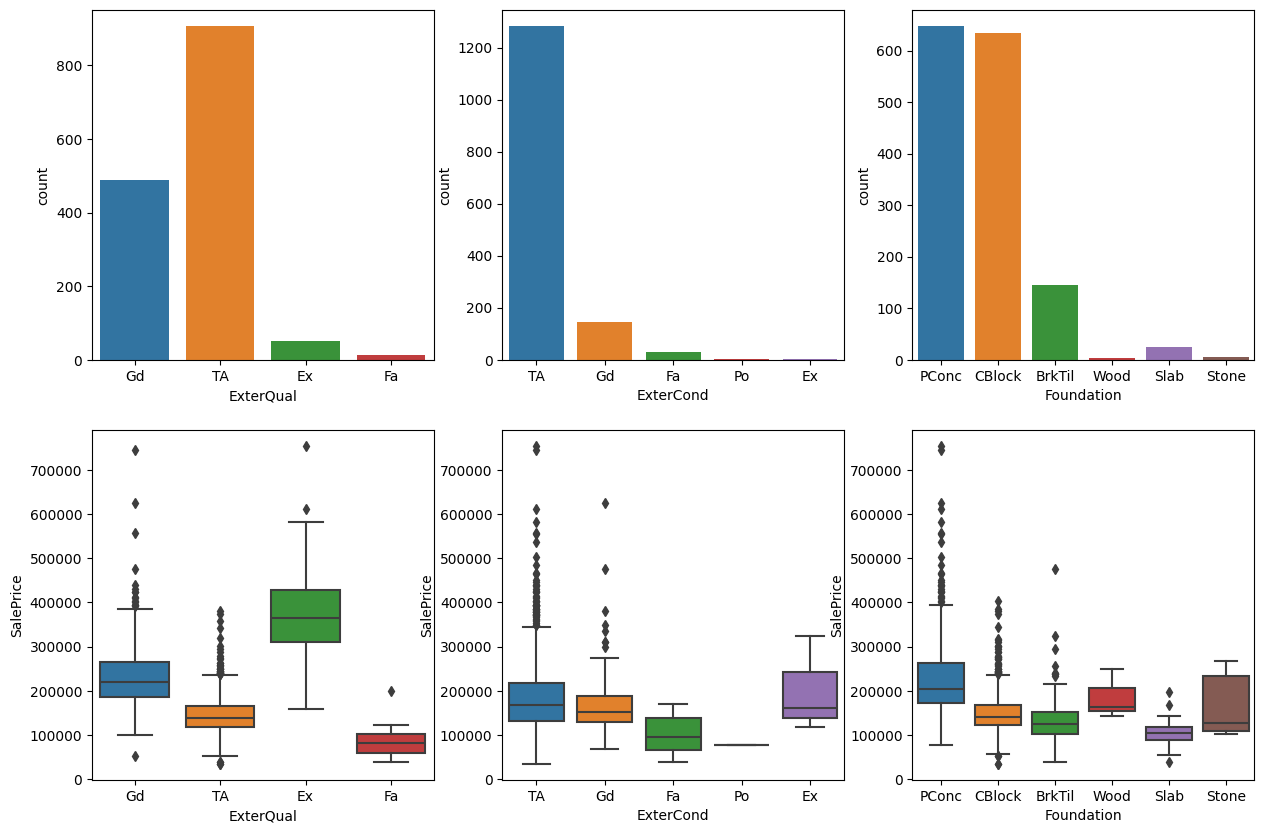

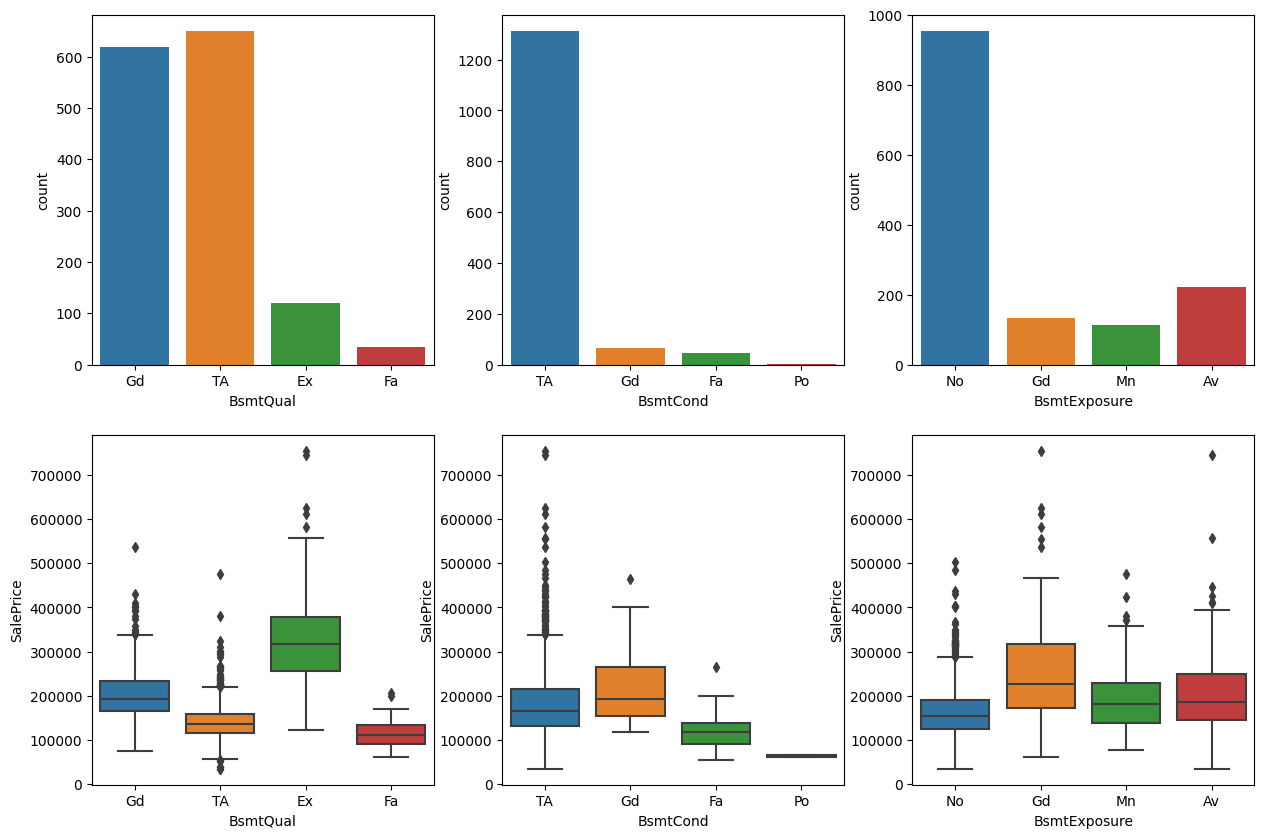

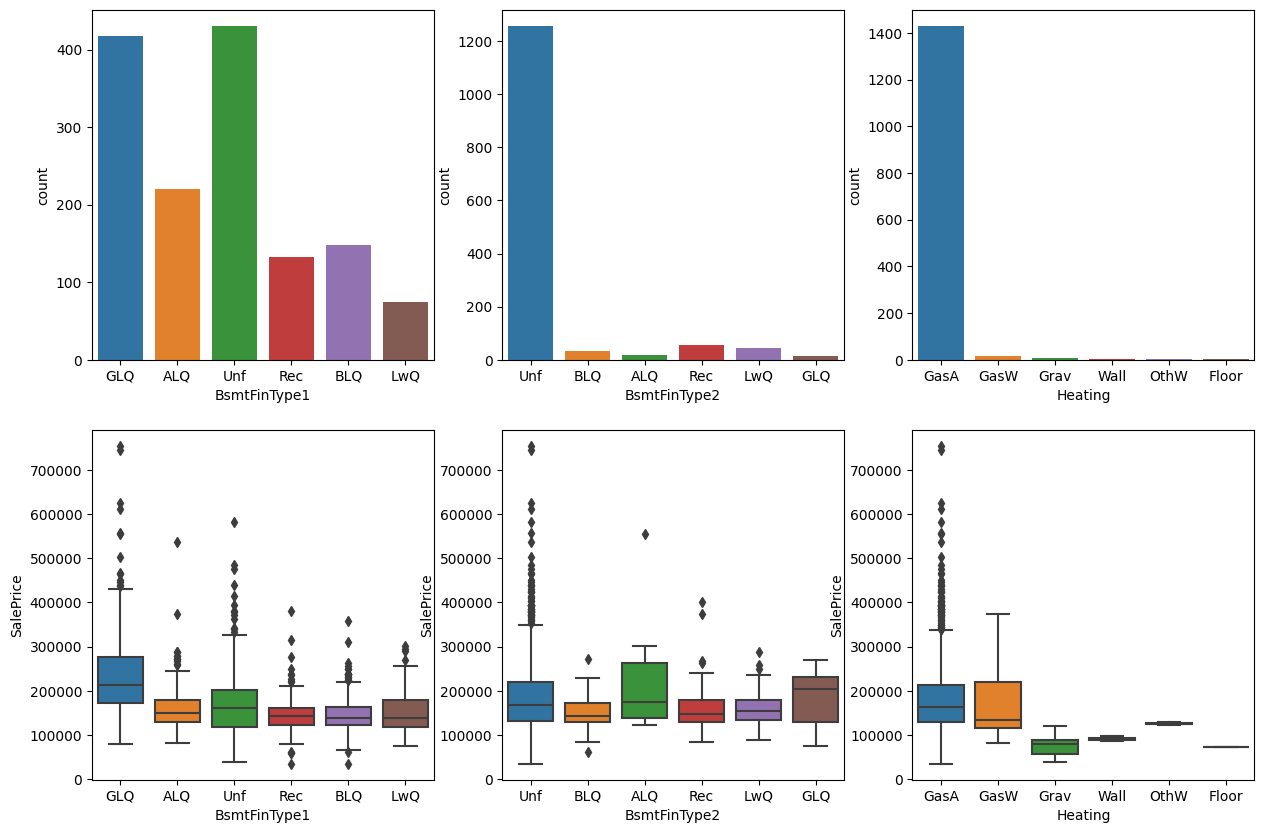

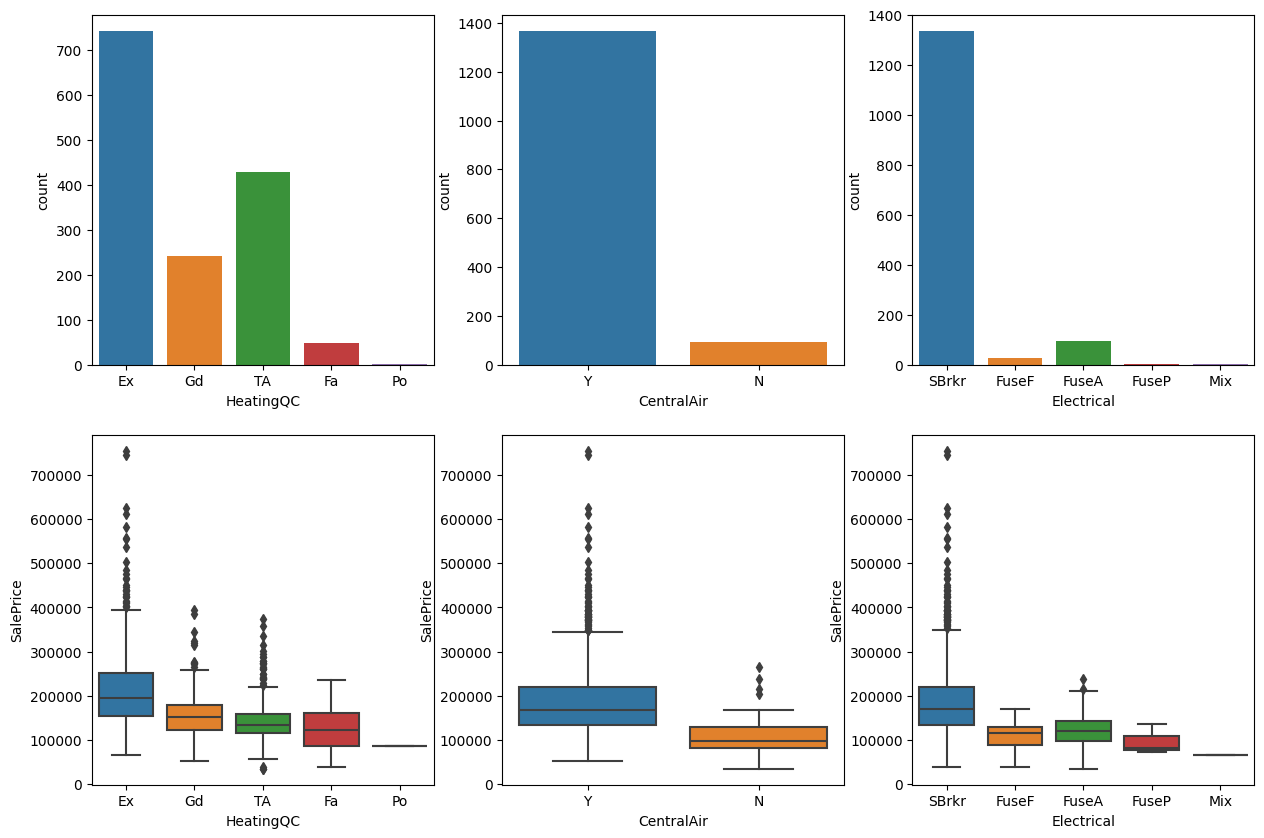

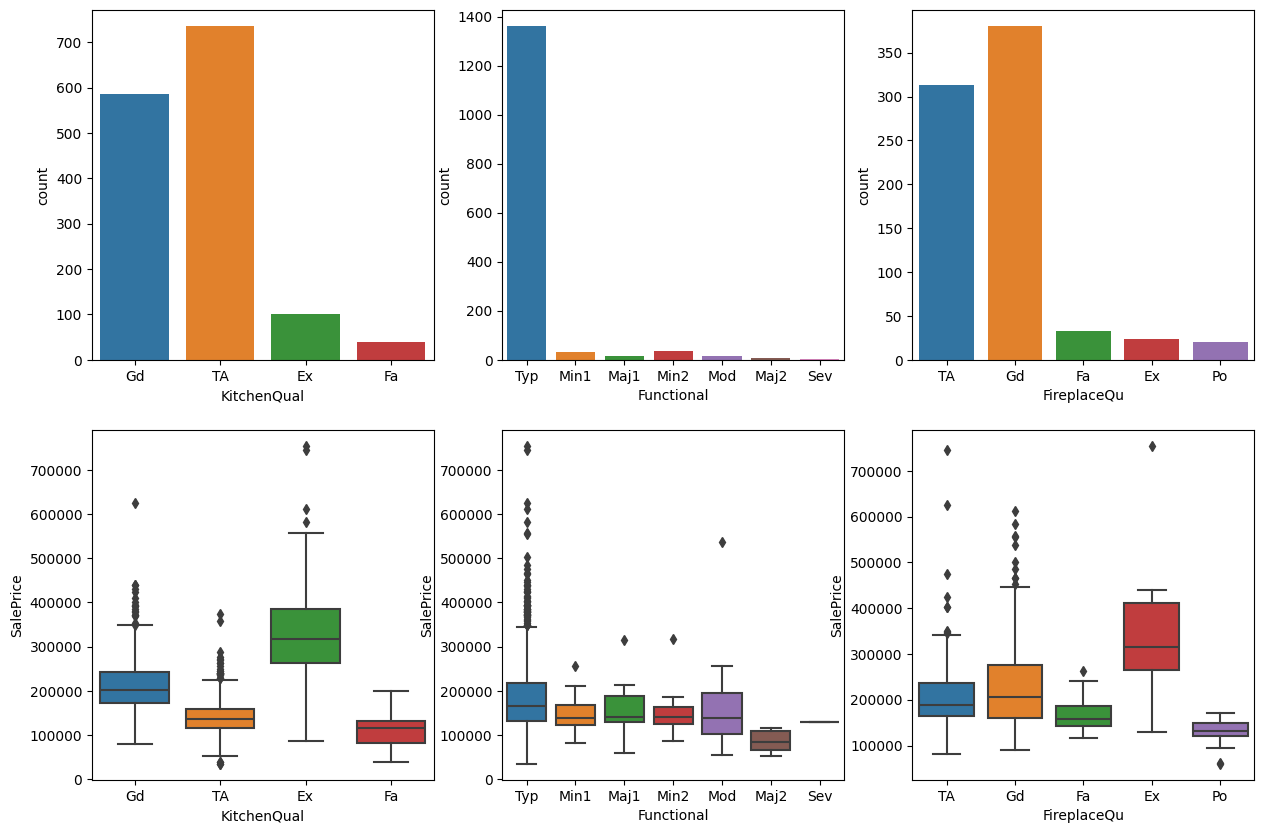

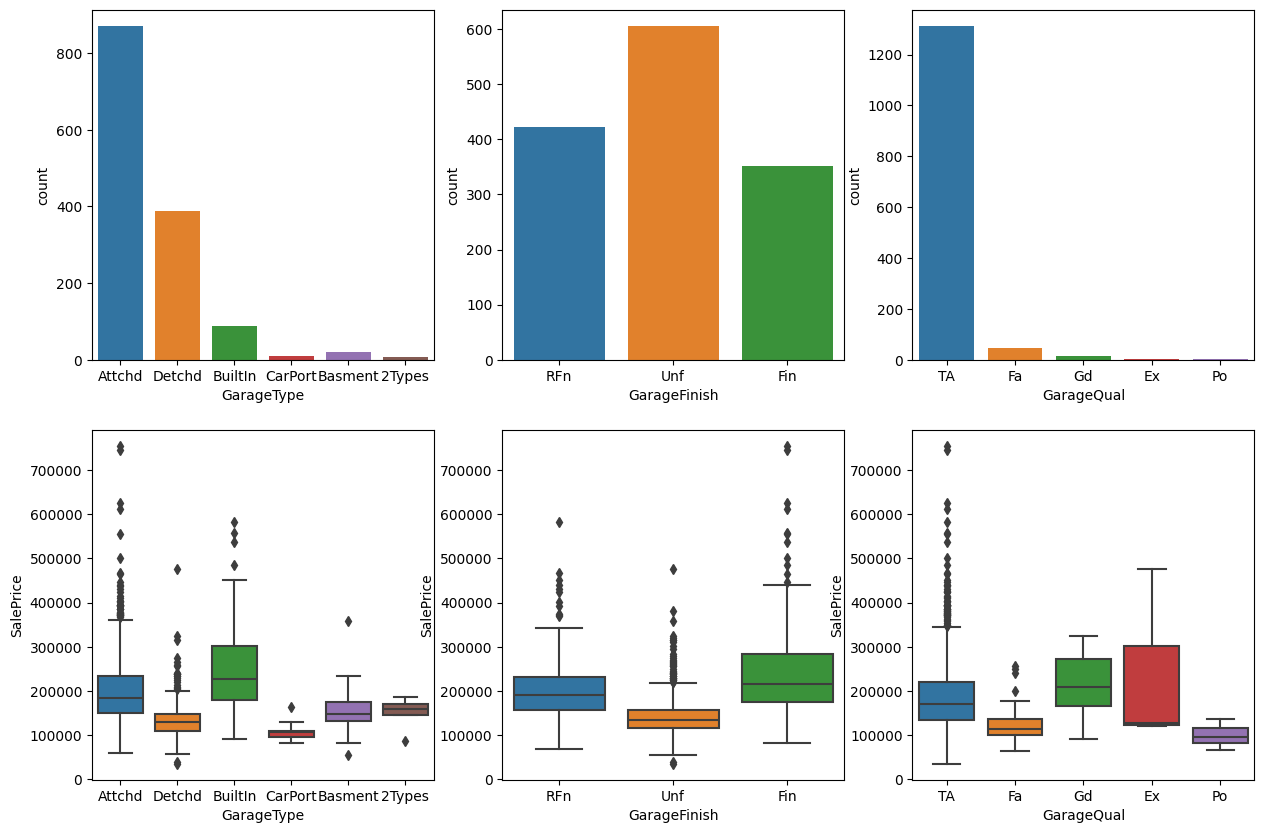

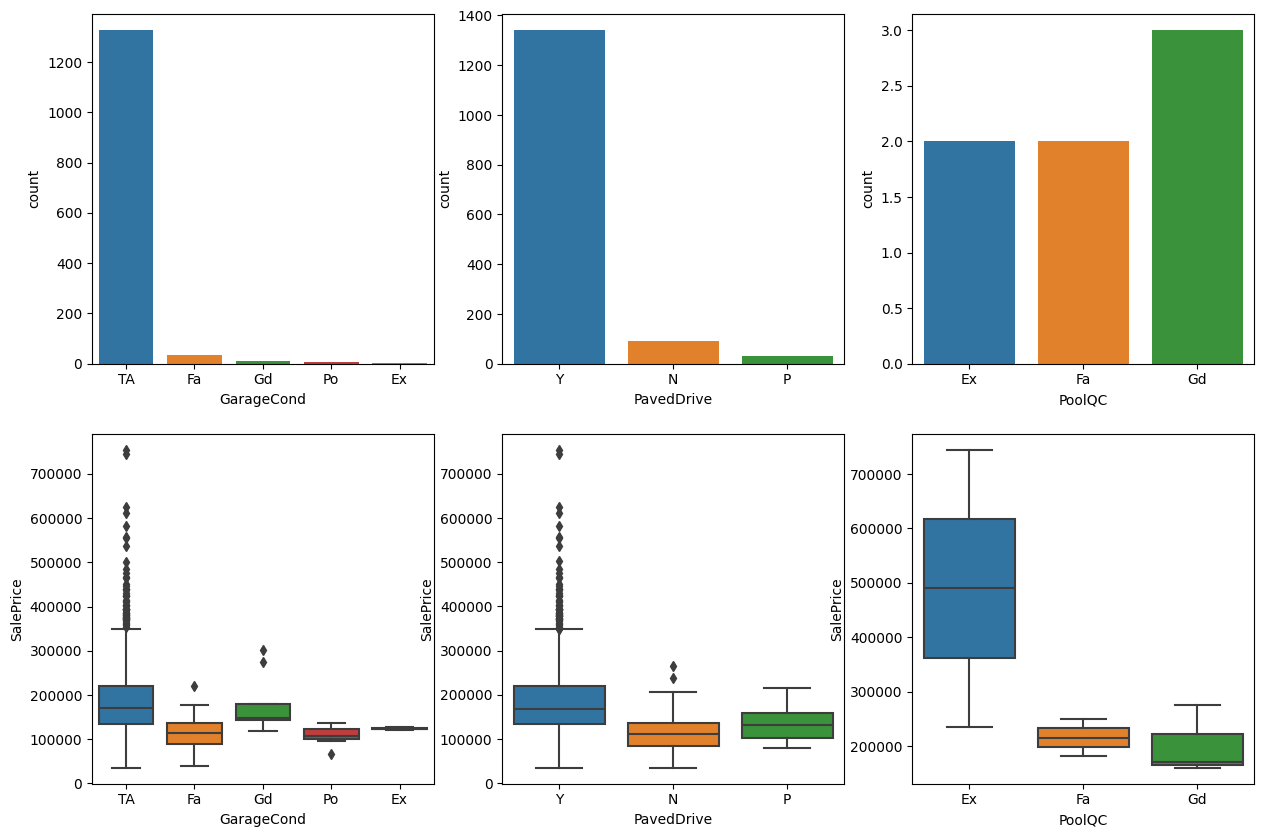

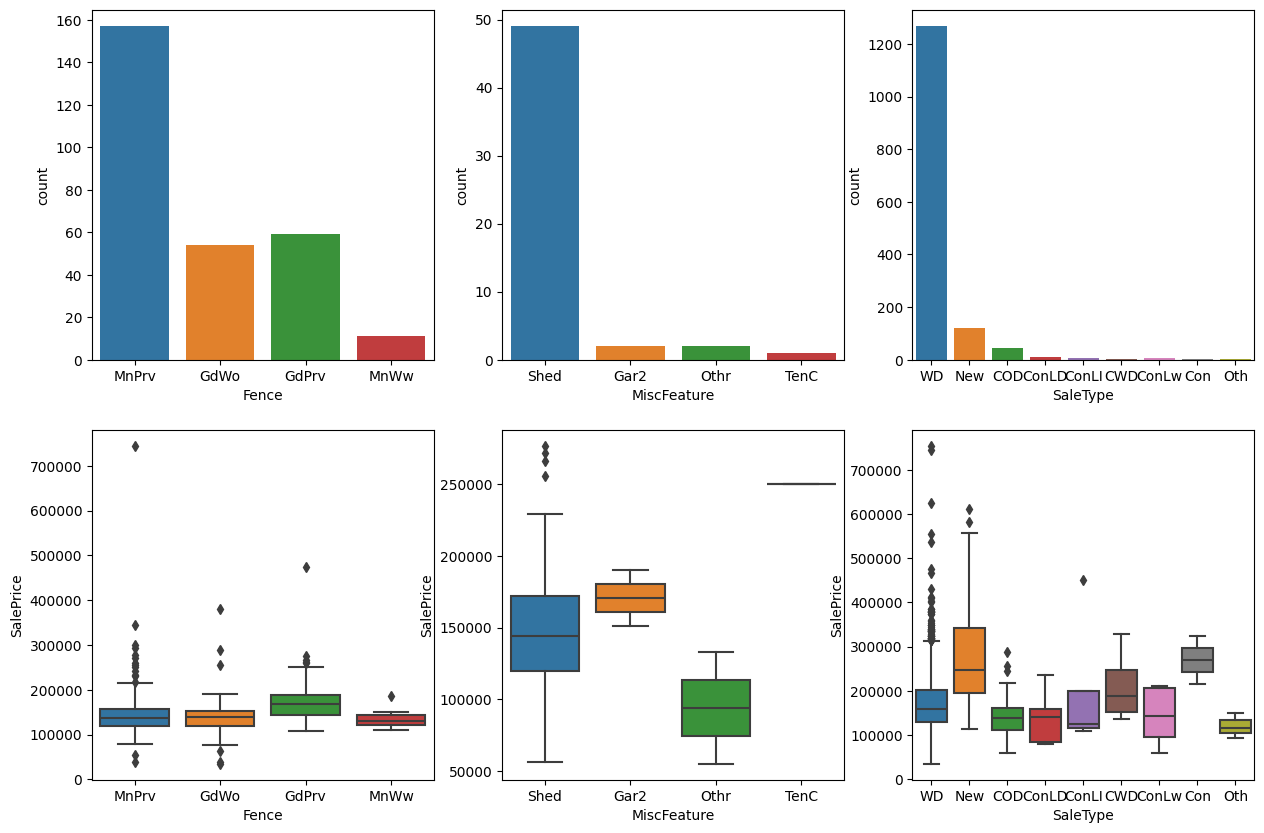

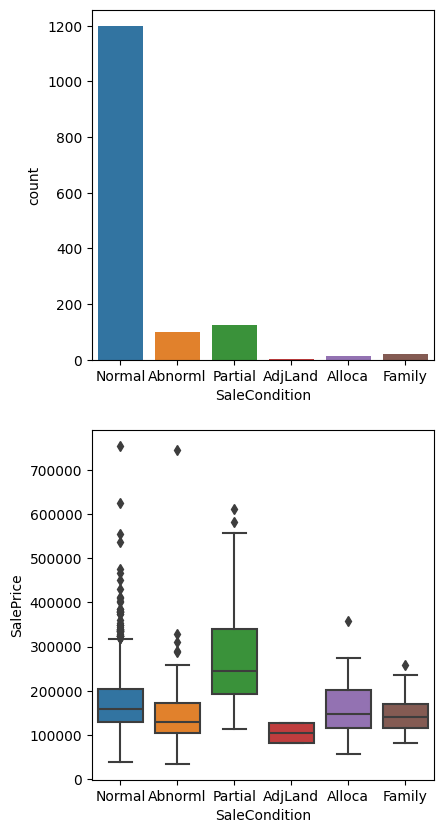

In [16]:
ix = 1
fig = plt.figure(figsize= (15, 10))
for c in cat_cols:
    if ix <= 3:
        ax1 = fig.add_subplot(2, 3, ix)
        sns.countplot(data=df, x=c, ax=ax1)
        ax2 = fig.add_subplot(2, 3, ix+3)
        sns.boxplot(data=df, x=c, y='SalePrice', ax=ax2)
    
    ix = ix +1
    if ix == 4:
        fig = plt.figure(figsize = (15, 10))
        ix=1

Might need to clean some/remove some categorical cols for better performance

# Building modelling pipeline


make a binned category for saleprice this can help with train_test_split stratify this balances the split based on different categories and not split too much of a specific bin which doesnt have as much data as the other bins

In [17]:
from sklearn.model_selection import train_test_split
df['SalePrice_binned'] = pd.cut(df['SalePrice'], bins=10, labels=False)

# here we train test split the data based on binned stratifying
X_train, X_test, y_train, y_test = train_test_split(df[all_features],
                                                    df[target_col],
                                                    test_size=0.20,
                                                    stratify=df['SalePrice_binned'])

The creation of the pipeline

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

num_transformer = Pipeline(steps=[('num_imputer', SimpleImputer(strategy='contant', fill_value=0),
                                   'scaler', StandardScaler())]) #change strategy to see how permance changes

cat_transformer = Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='constant', fill_value="NA"),
                                   ('encoder', TargetEncoder()))])

# combine the transformers
feature_transformations = ColumnTransformer(transformers=[('num_transformations', num_transformer, num_cols),
                                                          ('cat_transformations', cat_transformer, cat_cols)])


# Feature selection based on RFE RandomForestRegressor (feature ranking with recursive feature elimination)
feature_selectors = [RFE(RandomForestRegressor(n_estimators=75, max_depth=10, n_jobs=-1), n_features_to_select=int(len(all_features) * 0.16), step=3),
                     RFE(RandomForestRegressor(n_estimators=75, max_depth=10, n_jobs=-1),n_features_to_select=int(len(all_features) * 0.33), step=2),
                     RFE(RandomForestRegressor(n_estimators=75, max_depth=10, n_jobs=-1),n_features_to_select=int(len(all_features)*0.5), step=1)]
        
# Pipe
pipe = Pipeline(steps=[('feature_transformations', feature_transformations),
                       ('feature_selectors', RFE(RandomForestRegressor())),
                       ('model', LGBMRegressor())])

params_grid = [{'feature_transformation' : [feature_transformations],
                'feature_selectors': [feature_selectors[0], feature_selectors[1], feature_selectors[2]],
                'model': [LGBMRegressor(verbose=0)],
                'model__n_estimators': [int(x) for x in np.linspace(500, 750, num=200)],
                'model__max_depth': [int(x) for x in np.linspace(3, 12, num=9)],
                'model__colsample_bytree': [1, 0.5],
                'model__learning_rate': np.linspace(0.01, 0.1),
                'model__importance_type': ['gain']},
                
               {'feature_transformation' : [feature_transformations],
                'feature_selectors': [feature_selectors[0], feature_selectors[1], feature_selectors[2]],
                'model': [XGBRegressor(verbosity=-1)],
                'model__n_estimators': [int(x) for x in np.linspace(500, 750, num=200)],
                'model__max_depth': [int(x) for x in np.linspace(3, 12, num=9)],
                'model__colsample_bytree': [1, 0.5],
                'model__learning_rate': np.linspace(0.01, 0.1),
                'model__importance_type': ['gain']},

               {'feature_transformation' : [feature_transformations],
                'feature_selectors': [feature_selectors[0], feature_selectors[1], feature_selectors[2]],
                'model': [CatBoostRegressor(verbose=0)],
                'model__n_estimators': [int(x) for x in np.linspace(500, 750, num=200)],
                'model__max_depth': [int(x) for x in np.linspace(3, 12, num=9)],
                'model__learning_rate': np.linspace(0.01, 0.1),
                }]


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, make_scorer
from sklearn.model_selection import ShuffleSplit, RandomizedSearchCV

# Custom loss function: RMSE for log(y_true) - log(y_pred)
def neg_log_rmse(y_true, y_pred):
    return np.sqrt(((np.log(y_true) - np.log(y_pred)) ** 2).mean())

# here we create a custom log func that sklearn can evaluate
negative_log_rmse = make_scorer(neg_log_rmse, greater_is_better=False)

# Custom refit criteria which considers both mean and standard deviation for neg_log_rmse metric in the validation set
def custom_refit_criteria(cv_result_):
    cv_result_ = {key.replace("test", "validation") if "test" in key else key: value for key, value in cv_result_.items()}
    return np.argmax(cv_result_['mean_validation_neg_log_rmse'] - cv_result_['std_validation_neg_log_rmse'])

# All evaluation metrices to be evaluated in RandomSearchCV
evaluation_metrics = {'neg_mae': 'neg_mean_absolute_error',
                      'neg_mape': 'neg_mean_absolute_percentage_error',
                      'neg_mse': 'neg_mean_squared_error',
                      'neg_rmse': 'neg_root_mean_squared_error',
                      'neg_log_rmse': negative_log_rmse
                      }

cross_validator = ShuffleSplit(n_splits=5, test_size=0.2)

# Defining randomsearchCV object
best_model_pipe = RandomizedSearchCV(estimator=pipe,
                                     param_distributions=params_grid,
                                     n_iter=100,
                                     cv=cross_validator,
                                     scoring=evaluation_metrics,
                                     refit=custom_refit_criteria,
                                     error_score='raise',
                                     return_train_score=False,
                                     n_jobs=-1,
                                     verbose=0)

# Obtaining the best pipeline
best_model_pipe.fit(X_train, y_train)



ValueError: Invalid parameter 'feature_transformation' for estimator Pipeline(steps=[('feature_transformations',
                 ColumnTransformer(transformers=[('num_transformations',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='contant'),
                                                                   'scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', '...
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('feature_selectors',
                 RFE(estimator=RandomForestRegressor(max_depth=10,
                                                     n_estimators=75,
                                                     n_jobs=-1),
                     n_features_to_select=24, step=2)),
                ('model', LGBMRegressor(verbose=0))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:
# Printing results
print(f"\n-> Best Pipeline found in RandomSearchCV hyperparameter optimizer:\n {best_model_pipe.best_estimator_}")